##### Names: Marcus Hom, Andrew Krasinski, Uros Nikolic <br>
CWID: 20014292, 10475994, 20017063 <br>
Assignment: Final Project - Presidential Election 2020 <br>
Purpose: Present the skills learned in course <br>
Pledge: I pledge my honor that I have abided by Stevens Honor System. 

In [2]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pa.read_csv("Student Depression Dataset.csv")
df = df.dropna()
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Sleep Duration'] = df['Sleep Duration'].map({'Less than 5 hours': 0,'5-6 hours': 1, '7-8 hours': 2, 'More than 8 hours':3, 'Others':4})
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy':0,'Moderate':1,'Healthy':2,"Others":3})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'No':0,'Yes':1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No':0,'Yes':1})
features = df.drop(["id","City","Profession","Degree","Depression"],axis='columns')
features = features.astype('float32')
target = df["Depression"]
target = target.astype('float32')
features

BestModel = {}

In [4]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,1,2,B.Pharm,1,3.0,1.0,0,1
1,8,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,1,1,BSc,0,3.0,2.0,1,0
2,26,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,0,2,BA,0,9.0,1.0,1,0
3,30,1,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,2,1,BCA,1,4.0,5.0,1,1
4,32,1,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,1,1,M.Tech,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,1,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,1,0,Class 12,1,7.0,1.0,1,0
27897,140686,0,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,0,2,MSc,0,0.0,3.0,1,0
27898,140689,0,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,1,0,MD,0,12.0,2.0,0,0
27899,140690,1,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,0,2,Class 12,1,10.0,5.0,0,1


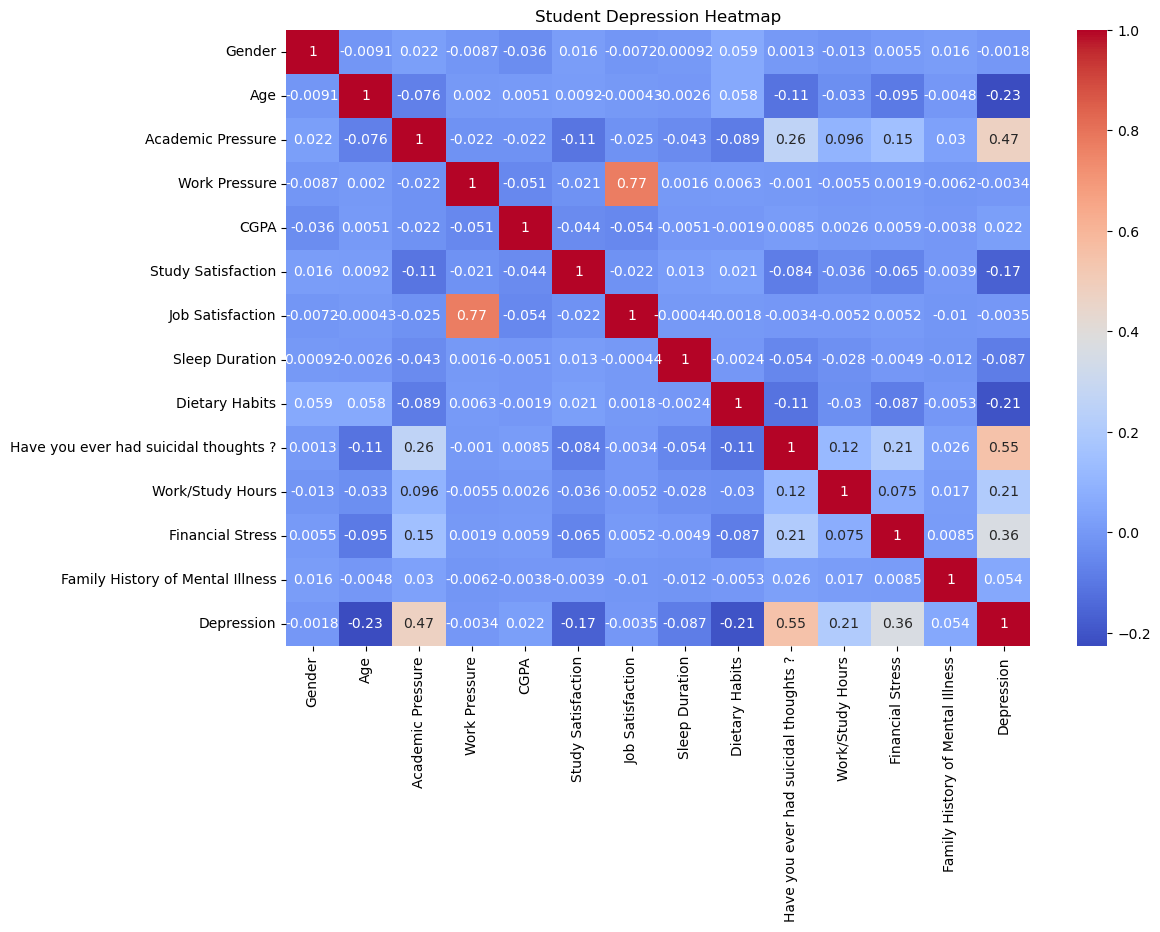

In [5]:
df = df.drop(["id", "City", "Profession", "Degree"], axis=1)

df = df.astype('float32')

# Calculate correlation
corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Student Depression Heatmap')
plt.show()

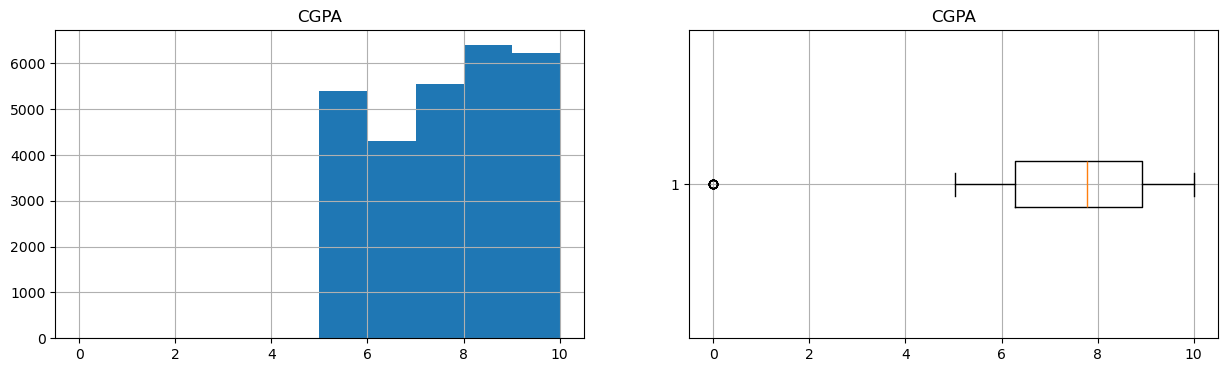

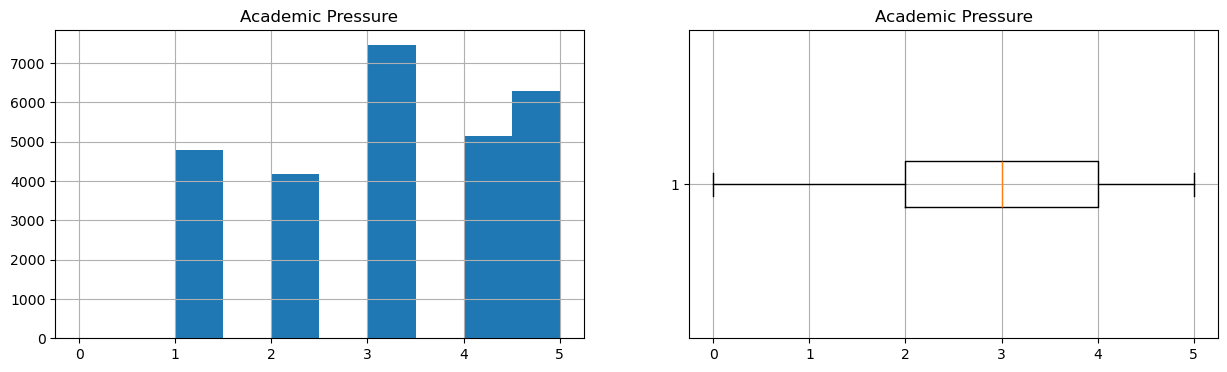

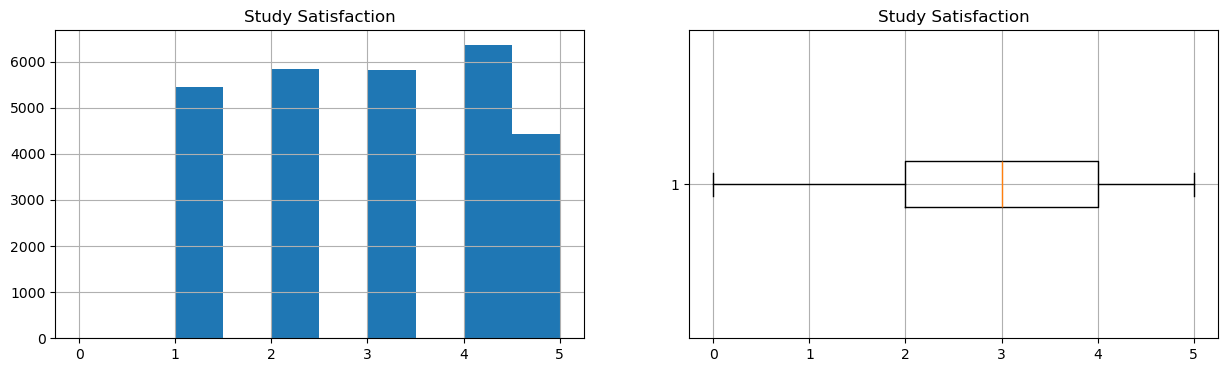

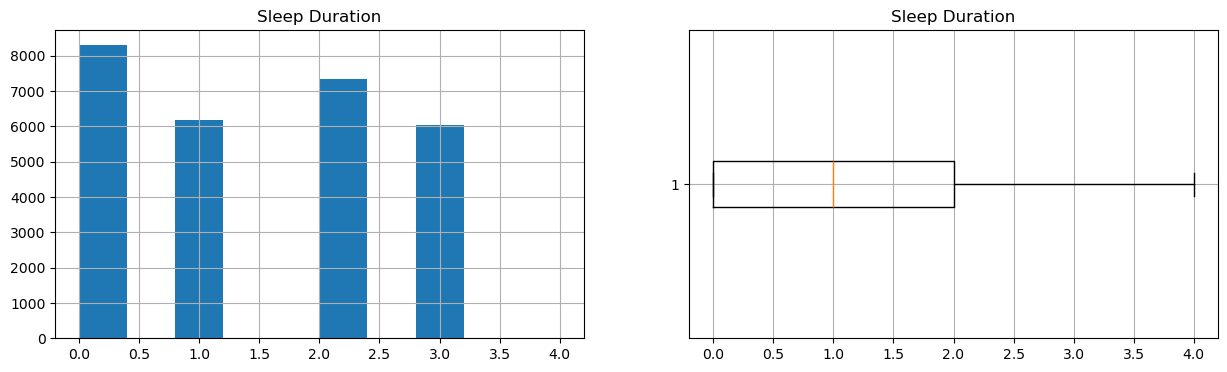

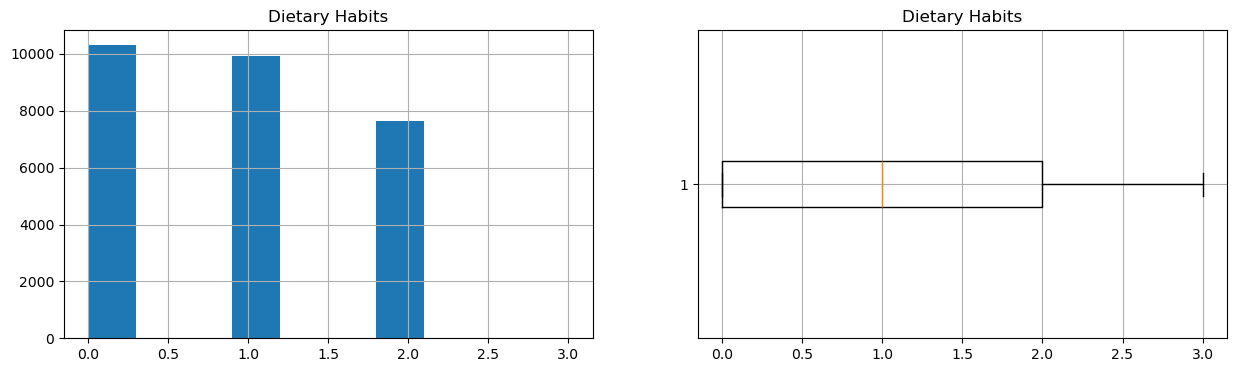

In [6]:
#Feature representation:

# Feature Exploration of Numerical Features
features_num = ['CGPA', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits']

# plot distribution of numerical features
for i in features_num:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4), sharex=True)
    ax1.hist(df[i])
    ax1.grid()
    ax1.set_title(i)
    ax2.boxplot(df[i], vert=False)
    ax2.grid()
    ax2.set_title(i)
    plt.show()

<br><h4>K-Nearest Neighbors</h4><br>

In [8]:
featuresTrain, featuresTest, targetTrain, targetTest = train_test_split(features, target, test_size=0.3, random_state=5)

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(featuresTrain, targetTrain)
target_Pred = knn.predict(featuresTest)

In [10]:
print("\nKNN Model:\n")
print(f"Accuracy: {accuracy_score(targetTest, target_Pred):.2f}\n")
KNNAccuracy = accuracy_score(targetTest, target_Pred)
print("Confusion Matrix:\n"+str(confusion_matrix(targetTest, target_Pred))+"\n")
print("Classification Report:\n"+str(classification_report(targetTest, target_Pred)+"\n"))
BestModel['KNN'] = KNNAccuracy


KNN Model:

Accuracy: 0.79

Confusion Matrix:
[[2462  974]
 [ 780 4154]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      3436
         1.0       0.81      0.84      0.83      4934

    accuracy                           0.79      8370
   macro avg       0.78      0.78      0.78      8370
weighted avg       0.79      0.79      0.79      8370




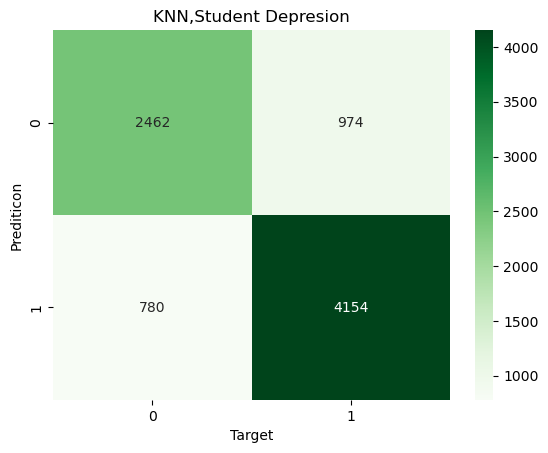

In [11]:
sns.heatmap(confusion_matrix(targetTest, target_Pred), annot=True, fmt='g', cmap='Greens')
plt.xlabel('Target')
plt.ylabel('Prediticon')
plt.title('KNN,Student Depresion')
plt.show()


<br><h4>Naive Bayes</h4><br>

In [13]:
le_republican = LabelEncoder()
target = le_republican.fit_transform(target)

In [14]:
featuresTrain, featuresTest, targetTrain, targetTest = train_test_split(features, target, test_size=0.3, random_state=5)

In [15]:
# Train separate Naive Bayes models for each target
cnb_democrat = CategoricalNB()
cnb_democrat.fit(featuresTrain, targetTrain)
targetPred = cnb_democrat.predict(featuresTest)

In [16]:
print("\nNaive Bayes:\n")
print(f"Accuracy: {accuracy_score(targetTest, targetPred):.2f}\n")
NBAccuracy = accuracy_score(targetTest, targetPred)
print("Confusion Matrix:\n"+str(confusion_matrix(targetTest, targetPred))+"\n")
print("Classification Report:\n"+str(classification_report(targetTest, targetPred)+"\n"))
BestModel['NB'] = NBAccuracy


Naive Bayes:

Accuracy: 0.85

Confusion Matrix:
[[2743  693]
 [ 575 4359]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      3436
           1       0.86      0.88      0.87      4934

    accuracy                           0.85      8370
   macro avg       0.84      0.84      0.84      8370
weighted avg       0.85      0.85      0.85      8370




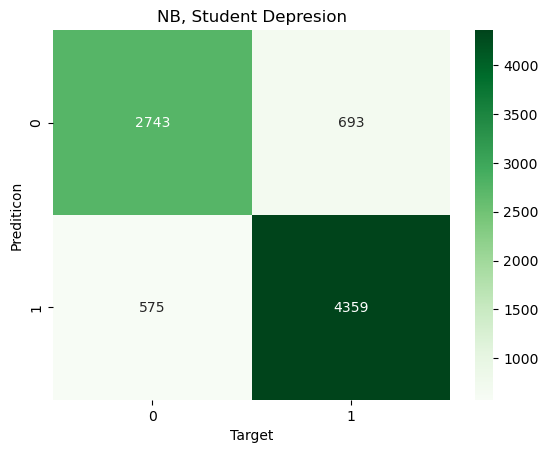

In [17]:
sns.heatmap(confusion_matrix(targetTest, targetPred), annot=True, fmt='g', cmap='Greens')
plt.xlabel('Target')
plt.ylabel('Prediticon')
plt.title('NB, Student Depresion')
plt.show()


<br><h4>Singualar value decomposition</h4><br>

In [19]:
# SVM Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(featuresTrain, targetTrain)

# Predict and evaluate SVM
svm_predictions = svm_model.predict(featuresTest)

In [20]:
print("\nSVM Model: \n")
print(f"Accuracy: {accuracy_score(targetTest, svm_predictions):.2f}\n")
SVMAccuracy = accuracy_score(targetTest, svm_predictions)
print("Confusion Matrix:\n" + str(confusion_matrix(targetTest, svm_predictions)) + "\n")
print("Classification Report:\n" + str(classification_report(targetTest, svm_predictions)) + "\n")
BestModel['SVM'] = SVMAccuracy


SVM Model: 

Accuracy: 0.85

Confusion Matrix:
[[2719  717]
 [ 546 4388]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      3436
           1       0.86      0.89      0.87      4934

    accuracy                           0.85      8370
   macro avg       0.85      0.84      0.84      8370
weighted avg       0.85      0.85      0.85      8370




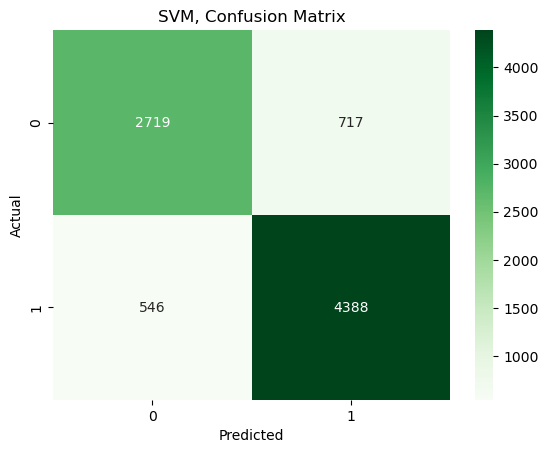

In [21]:
sns.heatmap(confusion_matrix(targetTest, svm_predictions), annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM, Confusion Matrix')
plt.show()

<br><h4>Artificial Nerual Network</h4><br>

In [23]:
# ANN Model
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_model.fit(featuresTrain, targetTrain)

# Predict and evaluate ANN
ann_predictions = ann_model.predict(featuresTest)

In [24]:
print("\nANN Model: \n")
print(f"Accuracy: {accuracy_score(targetTest, ann_predictions):.2f}\n")
ANNAccuracy = accuracy_score(targetTest, ann_predictions)
print("Confusion Matrix:\n" + str(confusion_matrix(targetTest, ann_predictions)) + "\n")
print("Classification Report:\n" + str(classification_report(targetTest, ann_predictions)) + "\n")
BestModel['ANN'] = ANNAccuracy


ANN Model: 

Accuracy: 0.85

Confusion Matrix:
[[2724  712]
 [ 565 4369]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      3436
           1       0.86      0.89      0.87      4934

    accuracy                           0.85      8370
   macro avg       0.84      0.84      0.84      8370
weighted avg       0.85      0.85      0.85      8370




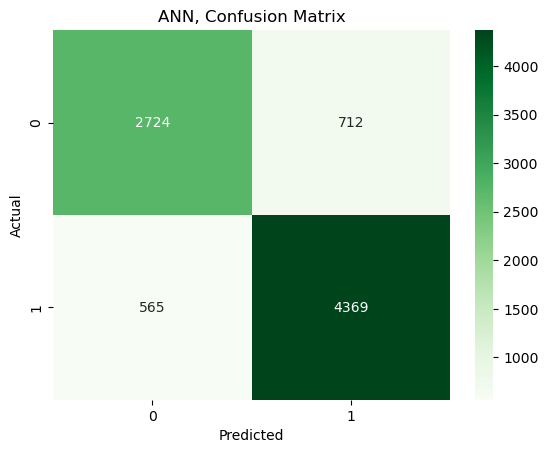

In [25]:
sns.heatmap(confusion_matrix(targetTest, ann_predictions), annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ANN, Confusion Matrix')
plt.show()

<br><h4>Classification and Regression Trees</h4><br>

In [27]:
#split 70 train 30 test
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [28]:
model = DecisionTreeClassifier(ccp_alpha=0.01) #prunes tree so only significant splits are visible
model.fit(features_train,target_train)
target_pred = model.predict(features_test)

In [29]:
print("\nCART Model: \n")
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")
CARTAccuracy = accuracy_score(target_test, target_pred)
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))
BestModel['CART'] = CARTAccuracy


CART Model: 

Accuracy= 0.7774193548387097
[[1900 1582]
 [ 281 4607]]
              precision    recall  f1-score   support

           0       0.87      0.55      0.67      3482
           1       0.74      0.94      0.83      4888

    accuracy                           0.78      8370
   macro avg       0.81      0.74      0.75      8370
weighted avg       0.80      0.78      0.76      8370



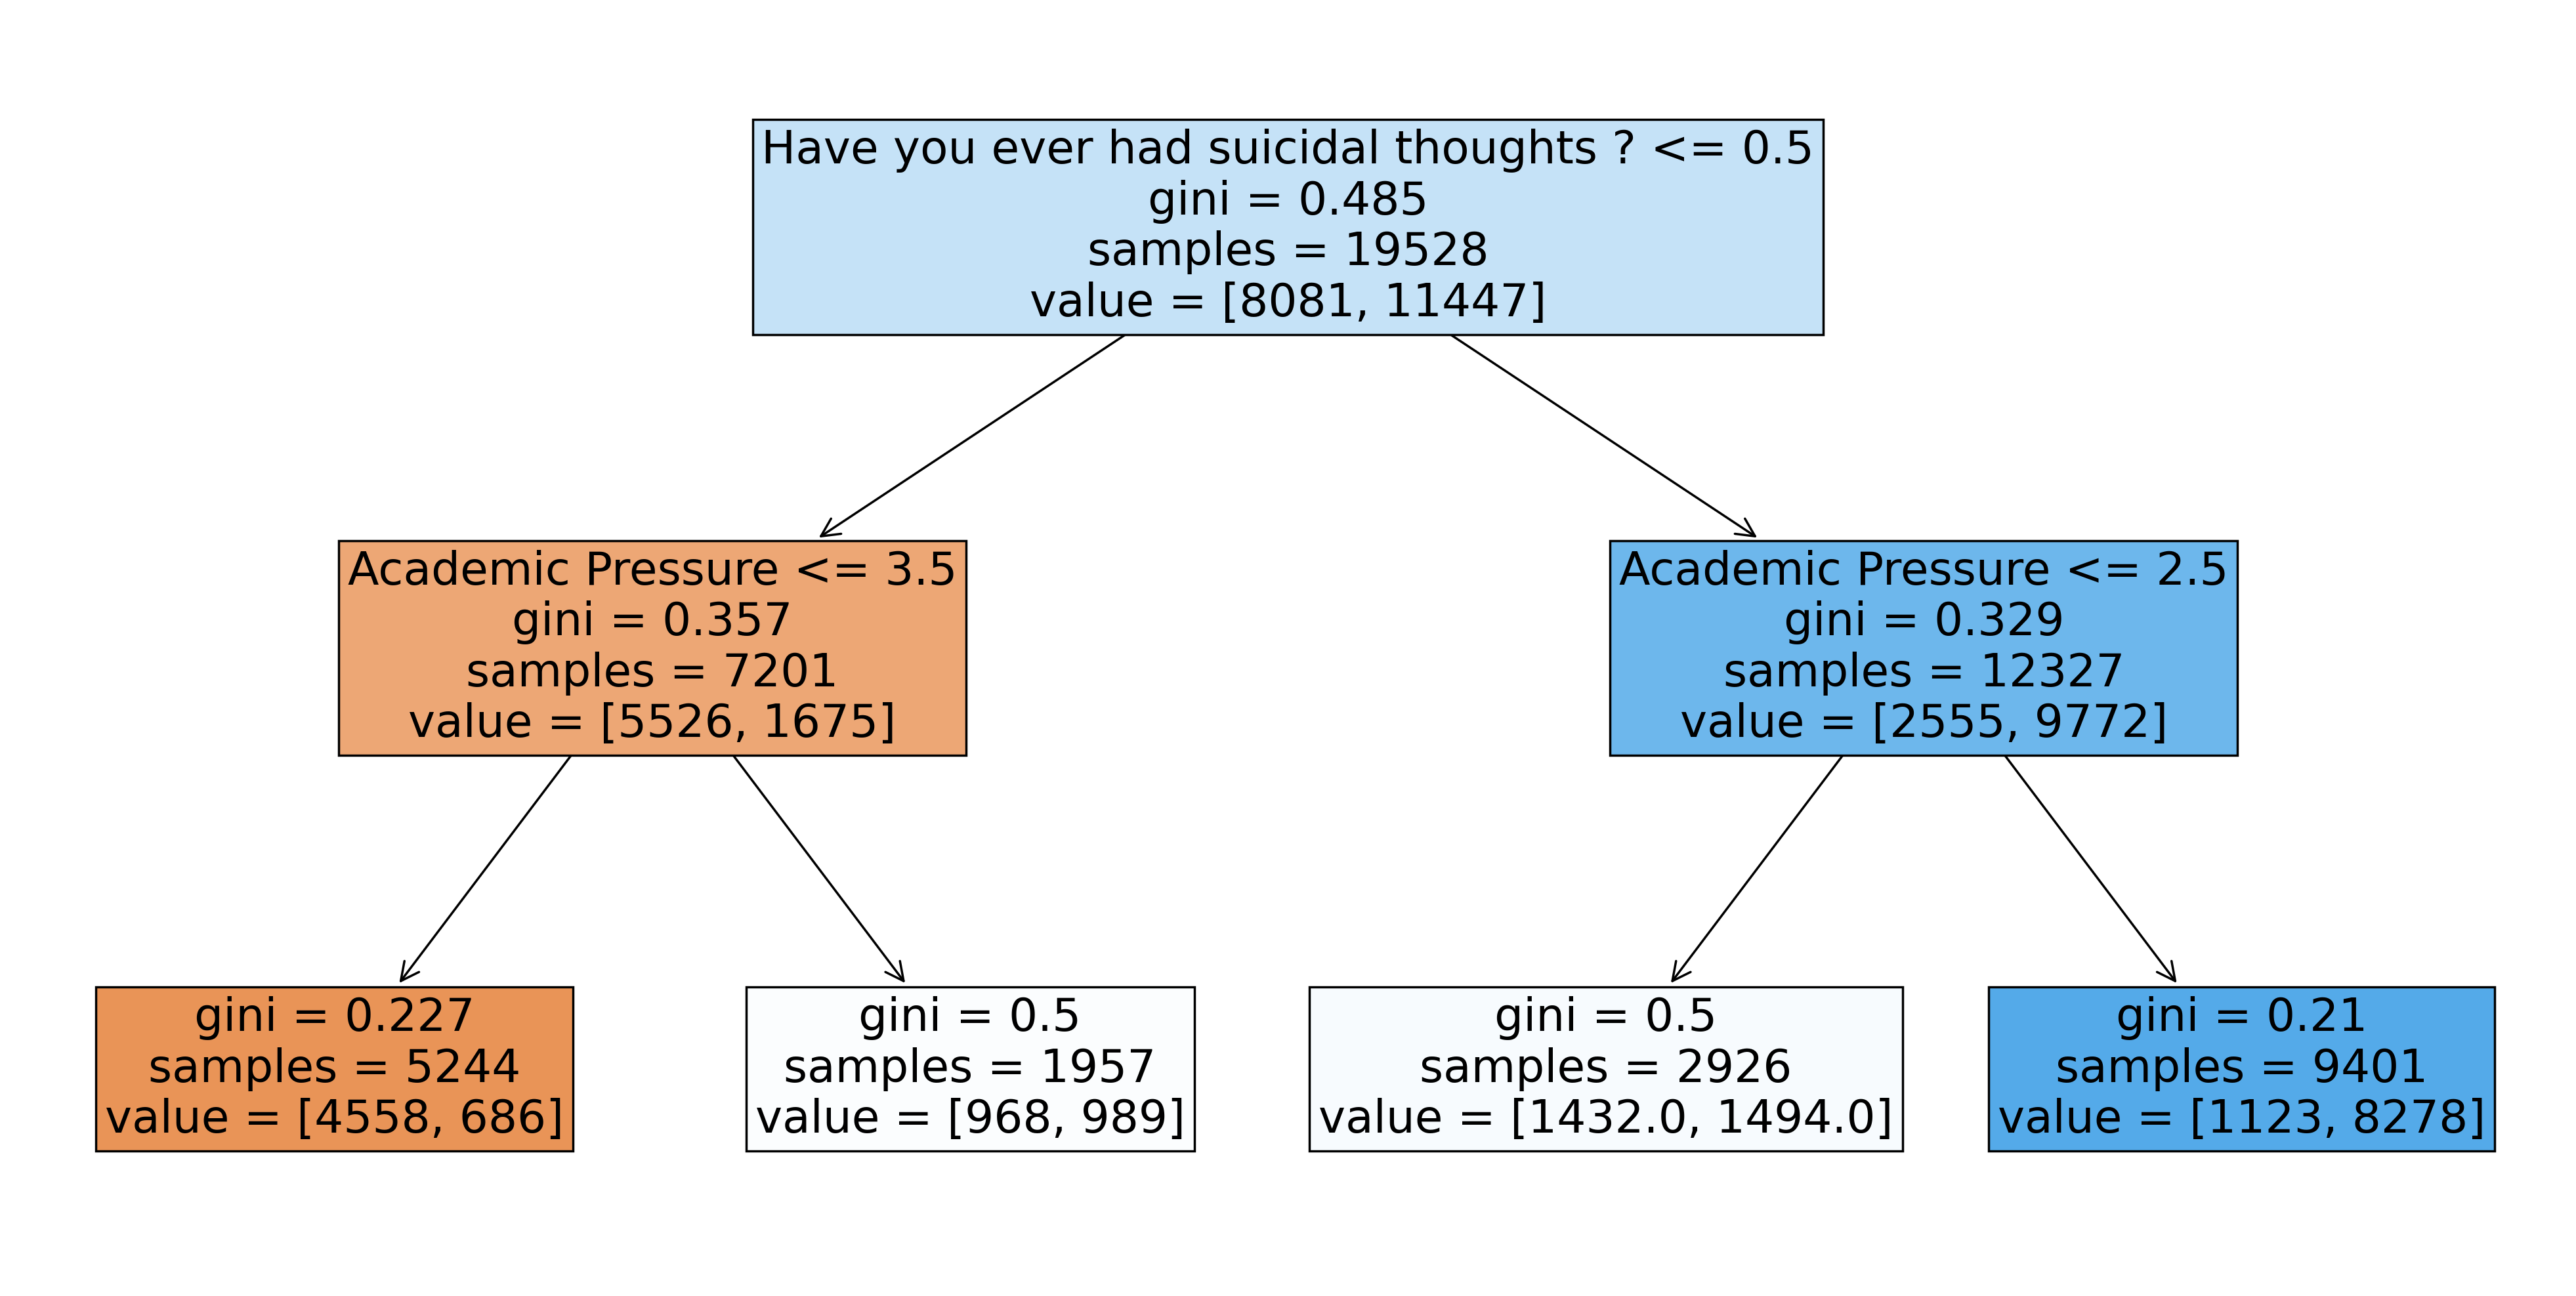

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=features.columns);

<br><h4>Random Forest</h4><br>

In [32]:
#Now Random Forest
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(features_train,target_train)
target_pred = model.predict(features_test)

In [33]:
print("\nRandom Forest Model: \n")
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")
RFAccuracy = accuracy_score(target_test,target_pred)
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))
BestModel['RF'] = RFAccuracy


Random Forest Model: 

Accuracy= 0.837037037037037
[[2679  803]
 [ 561 4327]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      3482
           1       0.84      0.89      0.86      4888

    accuracy                           0.84      8370
   macro avg       0.84      0.83      0.83      8370
weighted avg       0.84      0.84      0.84      8370



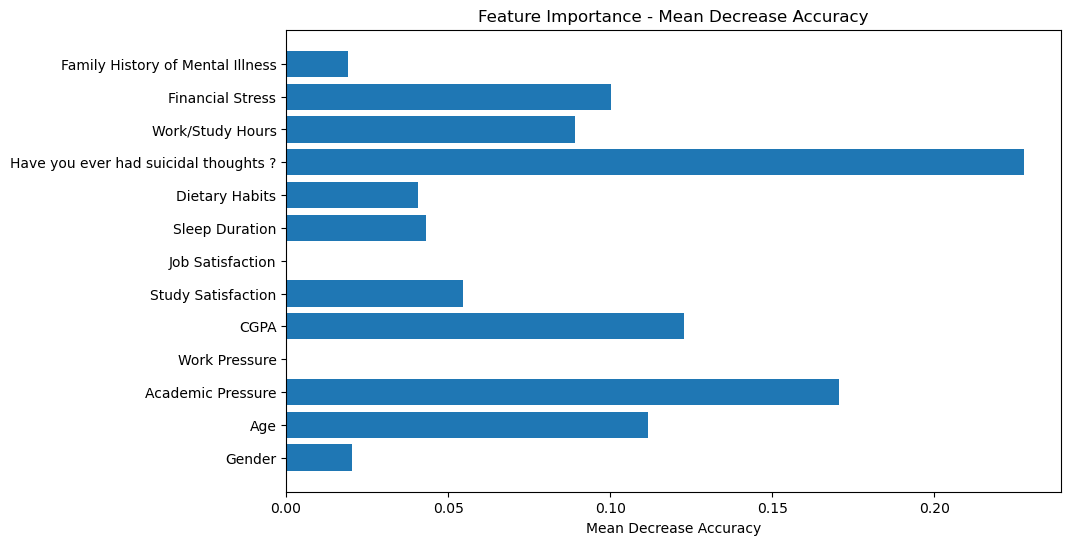

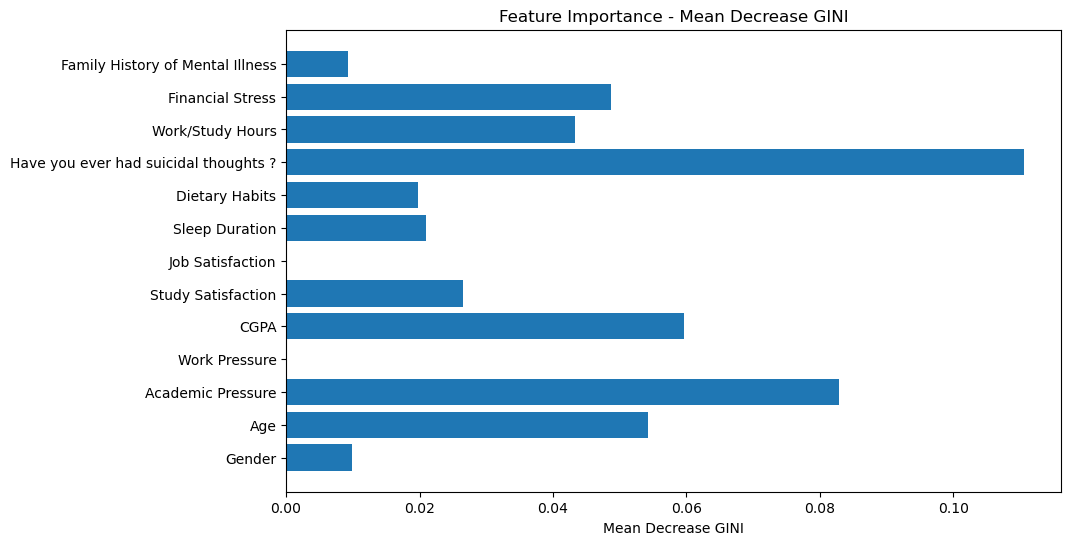

In [34]:
mean_decrease_accuracy = model.feature_importances_
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]

plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), features.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), features.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [35]:
feature_scores = pa.Series(model.feature_importances_, index=features_train.columns).sort_values(ascending=False)
print(feature_scores)

Have you ever had suicidal thoughts ?    0.227686
Academic Pressure                        0.170638
CGPA                                     0.122630
Age                                      0.111651
Financial Stress                         0.100072
Work/Study Hours                         0.089234
Study Satisfaction                       0.054703
Sleep Duration                           0.043063
Dietary Habits                           0.040740
Gender                                   0.020372
Family History of Mental Illness         0.019121
Job Satisfaction                         0.000084
Work Pressure                            0.000005
dtype: float64


In [36]:
ModelList = pa.DataFrame(BestModel, index=['Accuracy']).T
ModelList = ModelList.sort_values(by='Accuracy', ascending=False)
ModelList

,Accuracy
SVM,0.849104
NB,0.848507
ANN,0.847431
RF,0.837037
KNN,0.790442
CART,0.777419
